# Perturbation Law Indices

It is required to first build a POD object based on the Kriging metamodel or on the polynomial chaos in order to compute the PLI. It also can be used only if the input parameters dimension is greater than 2 (without counting the defect).

In [4]:
# import relevant module
import openturns as ot
import otpod
import numpy as np
# enable display figure in notebook
try:
    %matplotlib inline
except:
    pass

## Generate data

In [11]:
inputSample = ot.NumericalSample(
    [[4.59626812e+00, 7.46143339e-02, 1.02231538e+00, 8.60042277e+01],
    [4.14315790e+00, 4.20801346e-02, 1.05874908e+00, 2.65757364e+01],
    [4.76735111e+00, 3.72414824e-02, 1.05730385e+00, 5.76058433e+01],
    [4.82811977e+00, 2.49997658e-02, 1.06954641e+00, 2.54461380e+01],
    [4.48961094e+00, 3.74562922e-02, 1.04943946e+00, 6.19483646e+00],
    [5.05605334e+00, 4.87599783e-02, 1.06520409e+00, 3.39024904e+00],
    [5.69679328e+00, 7.74915877e-02, 1.04099514e+00, 6.50990466e+01],
    [5.10193991e+00, 4.35520544e-02, 1.02502536e+00, 5.51492592e+01],
    [4.04791970e+00, 2.38565932e-02, 1.01906882e+00, 2.07875350e+01],
    [4.66238956e+00, 5.49901237e-02, 1.02427200e+00, 1.45661275e+01],
    [4.86634219e+00, 6.04693570e-02, 1.08199374e+00, 1.05104730e+00],
    [4.13519347e+00, 4.45225831e-02, 1.01900124e+00, 5.10117047e+01],
    [4.92541940e+00, 7.87692335e-02, 9.91868726e-01, 8.32302238e+01],
    [4.70722074e+00, 6.51799251e-02, 1.10608515e+00, 3.30181002e+01],
    [4.29040932e+00, 1.75426222e-02, 9.75678838e-01, 2.28186756e+01],
    [4.89291400e+00, 2.34997929e-02, 1.07669835e+00, 5.38926138e+01],
    [4.44653744e+00, 7.63175936e-02, 1.06979154e+00, 5.19109415e+01],
    [3.99977452e+00, 5.80430585e-02, 1.01850716e+00, 7.61988190e+01],
    [3.95491570e+00, 1.09302814e-02, 1.03687664e+00, 6.09981789e+01],
    [5.16424368e+00, 2.69026464e-02, 1.06673711e+00, 2.88708887e+01],
    [5.30491620e+00, 4.53802273e-02, 1.06254792e+00, 3.03856837e+01],
    [4.92809155e+00, 1.20616369e-02, 1.00700410e+00, 7.02512744e+00],
    [4.68373805e+00, 6.26028935e-02, 1.05152117e+00, 4.81271603e+01],
    [5.32381954e+00, 4.33013582e-02, 9.90522007e-01, 6.56015973e+01],
    [4.35455857e+00, 1.23814619e-02, 1.01810539e+00, 1.10769534e+01]])

signals = ot.NumericalSample(
    [[ 37.305445], [ 35.466919], [ 43.187991], [ 45.305165], [ 40.121222], [ 44.609524],
     [ 45.14552 ], [ 44.80595 ], [ 35.414039], [ 39.851778], [ 42.046049], [ 34.73469 ],
     [ 39.339349], [ 40.384559], [ 38.718623], [ 46.189709], [ 36.155737], [ 31.768369],
     [ 35.384313], [ 47.914584], [ 46.758537], [ 46.564428], [ 39.698493], [ 45.636588],
     [ 40.643948]])

In [12]:
# signal detection threshold
detection = 38.

## Build POD with Kriging model
### Running the Kriging based POD

In [13]:
krigingPOD = otpod.KrigingPOD(inputSample, signals, detection)

# we can change all simulation size parameters as we are not interested in having an accurate POD curve
krigingPOD.setSamplingSize(200) 
krigingPOD.setSimulationSize(50)
krigingPOD.run()

Start optimizing covariance model parameters...
Kriging optimizer completed
kriging validation Q2 (>0.9): 1.0000
Computing POD per defect: [==================================================] 100.00% Done
CPU times: user 6.14 s, sys: 4.28 s, total: 10.4 s
Wall time: 3 s


### Show POD graphs

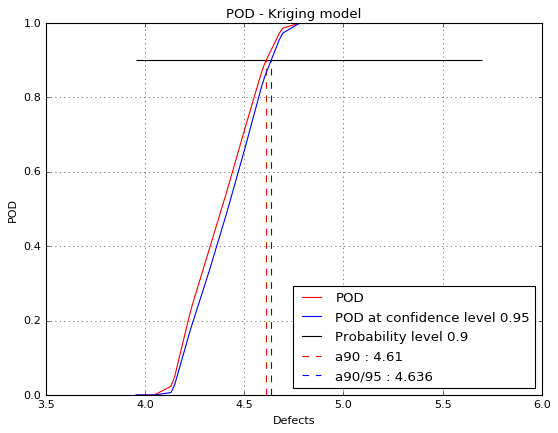

In [14]:
fig, ax = krigingPOD.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODKriging.png')
# The figure is saved in PODPolyChaos.png
fig.show()

## Build POD with polynomial chaos model
### Running the chaos based POD

In [15]:
chaosPOD = otpod.PolynomialChaosPOD(inputSample, signals, detection)

# we can change all simulation size parameters as we are not interested in having an accurate POD curve
chaosPOD.setSamplingSize(200)
chaosPOD.setSimulationSize(50)
chaosPOD.run()

Start build polynomial chaos model...
Polynomial chaos model completed
Polynomial chaos validation R2 (>0.8) : 0.9999
Polynomial chaos validation Q2 (>0.8) : 0.9987
Computing POD per defect: [==================================================] 100.00% Done
CPU times: user 3.53 s, sys: 596 ms, total: 4.12 s
Wall time: 1.93 s


### Show POD graphs

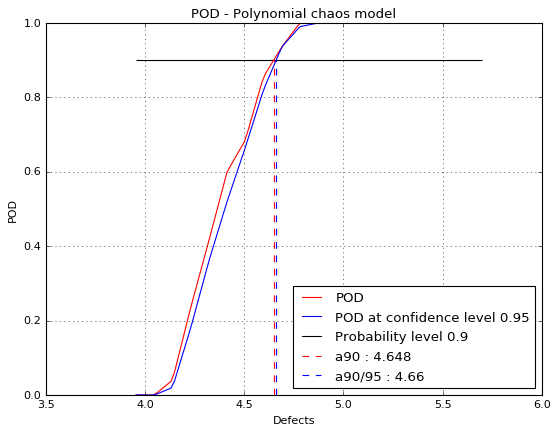

In [16]:
fig, ax = chaosPOD.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODChaos.png')
# The figure is saved in PODPolyChaos.png
fig.show()

## Run the sensitivity analysis

The sensitivity analysis can only be performed with POD computed with a kriging metamodel or a polynomial chaos.

The PLI are computed for the defect sizes defined in the POD study. However, if the probability estimate for a defect size is less than 1e-3 or greater than 0.999, then the indices are not computed.

The PLI can be computed either with perturbed mean or a perturbed variance. Two dedicated classes exists for each case.

### Mean perturbation
For the mean perturbation, it is possible to change the type of the mean shifting. If *sigmaScaled = False*, the given delta values are the new marginal means. If *sigmaScaled = True*, then $newMean = mean + sigma \times delta$, where sigma
is the standard deviation of each marginals.

It is adviced to set the *sigmaScaled* parameter to True when the input distribution are not equal.

#### with a Kriging POD

In [17]:
# the delta values
deltas = np.linspace(-1, 1, 6)
# sigma scaled is activated because the input distributions are not the same
pliMean = otpod.PLIMean(krigingPOD, deltas, sigmaScaled=True)
pliMean.run()

#### Draw the figure with given labels

The indices can be displayed either for a specific defect size. In this case, indices for all margins are plotted in the same figure. You can choose to display the indices with respect to the Hellinger distance (default case) in order to compare in the same scale the indices.

The second graph is a 2d contour plot where the indices for a given margin are plotted with respect to the defect size and the delta values. It enables you to compare the indices depending of the defect size. 

In [18]:
label = ['X1', 'variable2', 'param3']

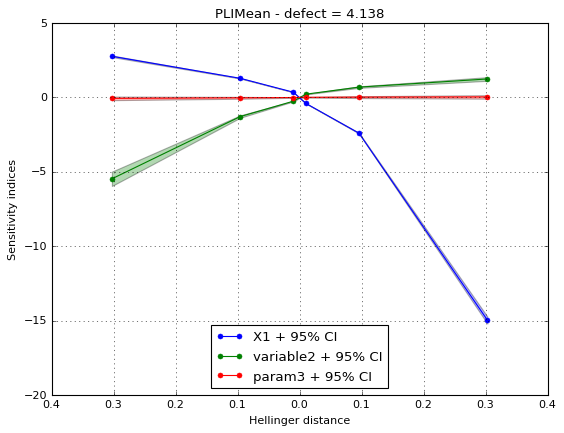

In [19]:
idefect = 2
fig, ax = pliMean.drawIndices(idefect, confidenceLevel=0.95,
                              label=label, hellinger=True)
ax.legend(loc='lower center')
fig.show()

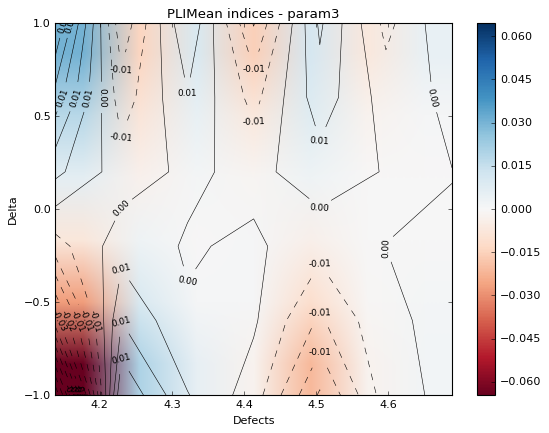

In [20]:
marginal = 2
fig, ax = pliMean.drawContourIndices(marginal, label[marginal])
fig.show()

#### Get the numerical results

The PLI values can be obtained thanks to the method *getIndices*. You can to get:
 - all indices values
 - indices for a specific marginal
 - indices for a specific delta value
 - indices for a specific defect size
 - a combination of above values
 
The nan values corresponds to the defect sizes for which the indices cannot be computed because the probability estimate is too small or too large.

In [21]:
print('Indices for marginal 1: ')
print(pliMean.getIndices(marginal=1))

Indices for marginal 1: 
[[        nan         nan -5.47183238 -0.43770215 -0.22644964 -0.14562948
  -0.09611319 -0.09935447 -0.05746253         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan -1.28662173 -0.22180929 -0.12398571 -0.08555665
  -0.05262299 -0.05717166 -0.03074273         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan -0.25378939 -0.06402069 -0.03767213 -0.02784247
  -0.01640227 -0.01827718 -0.00922909         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan]
 [        nan         nan  0.21614647  0.05992336  0.03567235  0.02796824
   0.01577573  0.01789474  0.0083912          nan         nan         nan
          nan         nan         nan         nan         nan         nan
      

In [22]:
print('Indices for defect 4: ')
print(pliMean.getIndices(idefect=4))

Indices for defect 4: 
[[  1.09347293e+00  -2.26449643e-01   5.25736353e-03]
 [  6.48300677e-01  -1.23985710e-01   5.46332364e-04]
 [  2.09390155e-01  -3.76721289e-02  -4.81674899e-04]
 [ -2.50243943e-01   3.56723519e-02   1.04956196e-03]
 [ -1.29198218e+00   1.04461511e-01   4.67552207e-03]
 [ -5.74859136e+00   1.67512468e-01   9.83388899e-03]]


#### PLI object for a specific defect size
From the base PLI object computed for each defect size, you can have access to more results :
- the confidence interval
- the perturbed probability estimate
- draw the perturbed marginal density

Perturbed probability estimate : 
[[ 0.58921468  0.14307553  0.2097866 ]
 [ 0.40523398  0.16835688  0.20773887]
 [ 0.26424247  0.19332331  0.20629464]
 [ 0.15418711  0.21802623  0.20515709]
 [ 0.07163711  0.24262661  0.20412897]
 [ 0.01853949  0.26757109  0.20288179]]


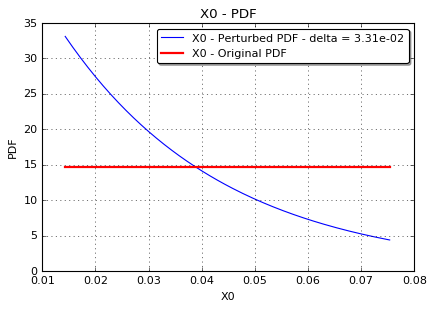

In [23]:
# get PLI object for the 3rd defect
pliMeanDefect3 = pliMean.getPLIObject(3)

print("Perturbed probability estimate : ")
print(pliMeanDefect3.getPerturbedProbabilityEstimate())

fig, ax = pliMeanDefect3.drawMarginal1DPDF(marginal=0, idelta=1)
fig.show()

#### with polynomial chaos

In [24]:
# the delta values
deltas = np.linspace(-1, 1, 6)
# sigma scaled is activated because the input distributions are not the same
pliMean = otpod.PLIMean(chaosPOD, deltas, sigmaScaled=True)
pliMean.run()

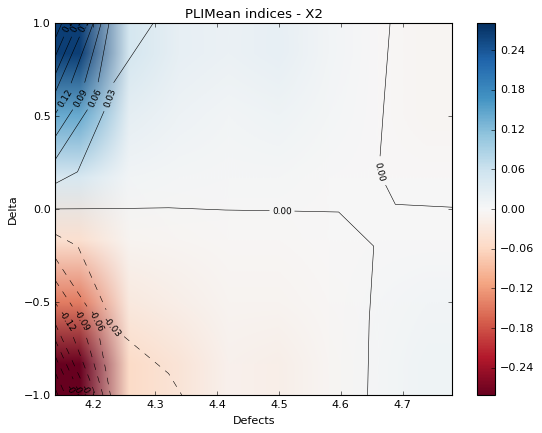

In [25]:
marginal = 2
fig, ax = pliMean.drawContourIndices(marginal)
fig.show()

### Variance perturbation

For the variance perturbation, the delta values must be greater than 0. The delta values corresponds to:
  - the new variance if *coefScaled = False*
  - $newCov = delta + cov$ if *covScaled = True*, this increases the coefficient of variation by delta. The new variance is computed such that the mean does not change.
 
It is also possible to define the delta values independently for each margin.

In [26]:
# the delta values
deltas = np.linspace(-0.02, 0.02, 3)

# with coef scaled
pliVar = otpod.PLIVariance(krigingPOD, deltas, covScaled=True)
pliVar.run()

With the Hellinger distance, we can see that the perturbed variance is not equivalent for all margins.

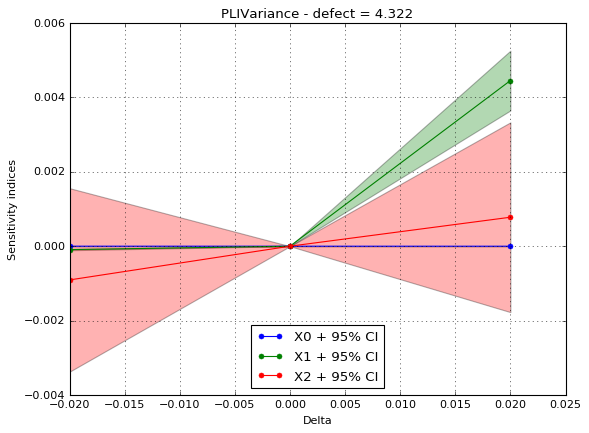

In [27]:
idefect = 4
fig, ax = pliVar.drawIndices(idefect, confidenceLevel=0.95,
                              hellinger=False)
ax.legend(loc='lower center')
fig.show()

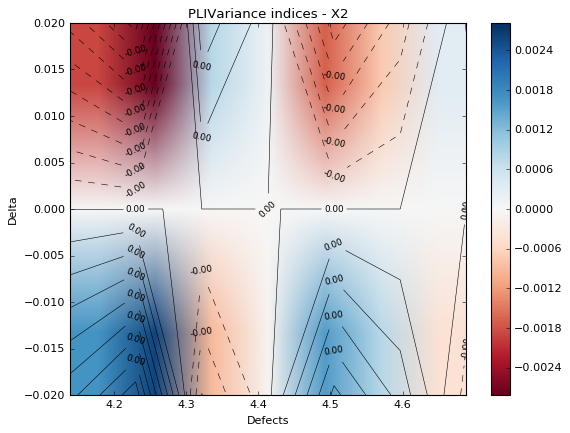

In [28]:
marginal = 2
fig, ax = pliVar.drawContourIndices(marginal)
fig.show()